
# Raw material market issue TASK 1 https://www.worldbank.org/en/research/commodity-markets

 Determine the position of the column "NGAS_EUR" in 2020.


In [499]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1 - Read data and information about it

In [500]:
import os
import numpy as np
from matplotlib import pyplot

import pandas as pd 

# tells matplotlib to embed plots within the notebook
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CMO-Historical-Data-Annual.csv')

In [501]:
df.head()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,BEEF,CHICKEN,LAMB,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960,1.63,..,1.63,..,..,..,0.14,0.404774,..,3.624357,0.589017,0.923517,0.695946,1.0297,0.930301,1.121401,1.0374,312.333333,..,..,327.000000,224.416667,..,91.833333,223.916667,81.008333,20.153697,44.500000,36.575000,107.349167,..,..,..,..,57.993333,..,0.142868,0.129983,0.736533,0.300130,..,1.605698,0.122356,0.125847,0.066208,1736.87,..,31.940000,..,149.174978,..,0.654542,..,0.780233,13.0,1.000000e-10,53.0,42.25,28.5,511.471832,11.42,678.755833,198.850000,2196.733333,1631.000000,246.191667,35.27,83.500000,0.913700
1,1961,1.57,..,1.57,..,..,..,0.15,0.404774,..,3.745790,0.478558,0.895542,0.669436,0.9518,0.892501,0.978601,0.9842,253.416667,..,..,330.250000,228.416667,..,109.333333,287.333333,96.908333,20.748040,44.956667,41.416667,118.950000,..,..,..,..,58.605833,..,0.134922,0.133008,0.681950,0.312279,..,1.693883,0.124341,0.125663,0.059450,1563.19,..,33.060000,..,151.977281,..,0.672183,..,0.601308,13.0,1.000000e-10,52.0,42.25,30.0,511.471832,11.02,633.084167,176.975000,2449.891667,1711.000000,214.308333,35.25,83.500000,0.924442
2,1962,1.52,..,1.52,..,..,..,0.16,0.404774,..,3.867224,0.457967,0.832592,0.682204,0.9730,0.861001,1.104601,0.9534,251.216667,..,..,274.340000,216.235833,..,100.540000,227.000000,89.008333,22.702439,48.653333,44.700833,134.925833,..,..,..,..,64.332500,..,0.131390,0.108008,0.714125,0.319562,..,2.252387,0.126325,0.128419,0.061683,1404.90,..,36.390000,..,160.060969,..,0.649325,..,0.563633,11.5,1.000000e-10,51.0,42.25,30.0,498.060392,11.01,645.143333,155.283333,2471.383333,1761.000000,185.925000,35.23,83.500000,1.083725
3,1963,1.50,..,1.50,..,..,..,0.16,0.391351,..,3.803412,0.552342,0.805742,0.623507,0.9529,0.814801,1.083601,0.9604,286.333333,..,..,268.503333,222.393333,..,110.093333,223.583333,91.016667,23.977474,53.770833,47.840000,125.663333,..,..,..,..,64.486667,..,0.144083,0.094008,0.666342,0.328029,..,1.997018,0.126766,0.165898,0.183233,1343.61,..,35.485833,..,157.847462,..,0.645592,..,0.521383,11.5,1.000000e-10,52.0,42.25,30.0,498.795265,11.02,645.950833,174.808333,2507.733333,1741.666667,211.508333,35.09,80.930833,1.279108
4,1964,1.45,..,1.45,..,..,..,0.15,0.384150,..,3.647743,0.505742,1.009758,0.787068,0.9270,0.819001,1.039501,0.9226,296.475000,..,..,315.375833,239.452500,..,110.505833,233.000000,89.008333,25.143383,54.631667,48.235000,120.147500,..,..,..,..,67.526667,..,0.170408,0.084000,0.840883,0.337631,..,1.813300,0.126582,0.138707,0.126325,1488.30,..,30.255000,..,144.833993,..,0.650358,..,0.490508,12.5,1.000000e-10,53.0,60.50,32.5,525.985631,10.24,969.753333,277.883333,3412.741667,1741.666667,326.491667,35.10,88.480833,1.293000


In [502]:
df.tail()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,BEEF,CHICKEN,LAMB,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
56,2016,42.811944,44.0475,41.200833,43.1875,66.12333333,63.94666667,2.492217,4.563423,7.372443958,56.953090,2.890762,3.611076,1.953128,2.684934,3.301667,2.331731,2.421403,1481.776667,1392.861952,1490.636667,1380.630833,735.703333,1301.319167,405.447500,814.994167,374.661667,103.915682,159.160887,155.591057,396.166667,385.3333333,380.335,356.0966667,176.3037836,166.632543,0.905275105,1.001150,0.889680,4.060892,1.852558,4.694228583,11.216372,0.361461,0.609247,0.398063,4790.496528,387.40625,274.376883,649.6071962,738.879208,503.2688913,1.636122,1.381125,1.605183,110.456250,315.813542,290.270833,194.129167,260.333333,1604.181667,58.424167,4867.897500,1866.653333,17933.76167,9595.179167,2089.975000,1248.988333,987.086667,17.146750
57,2017,52.805000,54.3925,53.115833,50.90666667,88.51833333,85.14916667,2.961475,5.717043,8.606124194,68.971560,2.029411,3.323207,2.225527,3.148479,4.051667,2.423216,2.970556,1650.650000,1486.6825,1366.966667,1460.792500,750.813333,1288.463333,393.378112,850.396667,350.241667,97.638639,154.531539,163.022463,398.916667,384.6666667,379.9008333,363.2466667,178.1826099,174.195616,0.899105257,1.075882,0.812035,4.387258,2.124738,5.419493625,13.318201,0.368754,0.615548,0.353125,4627.364583,395.2229167,265.428525,617.2803649,702.109875,486.8555897,1.842989,1.666858333,1.995442,89.687500,323.027083,283.204167,213.875000,218.229167,1967.654167,71.760000,6169.940000,2314.665000,20061.16917,10409.635000,2890.866667,1257.559167,948.453333,17.066167
58,2018,68.347500,71.07166667,69.151667,64.81916667,107.0225,97.64333333,3.155092,7.681680,10.66987582,82.060726,2.293768,2.925972,1.869261,2.848214,3.605000,2.359377,2.580264,996.770000,1319.869167,1525.1025,1446.049167,638.655833,926.4766667,394.424167,789.117500,405.225833,125.885333,164.414547,168.589129,420.666667,408.0833333,401.07,406.1441667,203.890931,209.928835,0.946853459,1.147149,0.789854,4.195043,2.243024,5.874077333,12.237019,0.385852,0.559257,0.275614,4865.956944,413.5483333,269.703938,639.9921999,727.942875,494.6976593,2.014582,1.367833333,1.565325,87.900000,393.425000,346.735833,249.449583,215.500000,2108.475000,69.751667,6529.798333,2240.435000,20145.20583,13114.064170,2922.379167,1269.226667,879.545833,15.713750
59,2019,61.407500,64.03166667,63.177500,57.01333333,77.88583333,71.94166667,2.565883,4.802351,10.5643019,61.145976,2.340822,2.879767,1.621774,2.562814,3.100833,2.376400,2.211208,735.650833,1337.805833,1447.989167,1407.374167,601.366667,665.39,368.946667,765.440000,347.022500,128.066988,170.070088,161.506787,418.000000,410.4166667,393.4933333,351.8841667,211.2757963,201.692129,0.875720336,1.140546,0.560006,4.763660,1.998396,..,12.601057,0.365668,0.576729,0.280023,4579.358333,391.9154167,273.103523,611.8100389,695.887792,500.9332625,1.716940,1.410441667,1.640392,87.958333,306.355000,294.548333,245.281667,255.500000,1794.488333,93.849167,6010.145000,1996.507500,18661.15667,13913.908330,2550.410000,1392.498333,863.989167,16.217583
60,2020,41.257778,42.3,42.165000,39.30833333,60.785,65.65666667,2.014375,3.242024,8.313347571,45.506044,2.369864,3.323630,1.515878,2.699300,3.404167,2.686275,2.007458,1010.403714,1838.6725,1432.699593,1672.415455,751.766158,824.0723504,406.639842,837.756322,394.179002,97.600365,165.466000,171.574551,496.750000,481.8333333,474.6166667,427.96,227.7387976,212.010976,0.897117813,1.216330,0.

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     61 non-null     int64  
 1   CRUDE_PETRO    61 non-null     float64
 2   CRUDE_BRENT    61 non-null     object 
 3   CRUDE_DUBAI    61 non-null     float64
 4   CRUDE_WTI      61 non-null     object 
 5   COAL_AUS       61 non-null     object 
 6   COAL_SAFRICA   61 non-null     object 
 7   NGAS_US        61 non-null     float64
 8   NGAS_EUR       61 non-null     float64
 9   NGAS_JP        61 non-null     object 
 10  iNATGAS        61 non-null     float64
 11  COCOA          61 non-null     float64
 12  COFFEE_ARABIC  61 non-null     float64
 13  COFFEE_ROBUS   61 non-null     float64
 14  TEA_AVG        61 non-null     float64
 15  TEA_COLOMBO    61 non-null     float64
 16  TEA_KOLKATA    61 non-null     float64
 17  TEA_MOMBASA    61 non-null     float64
 18  COCONUT_OIL 

In [504]:
df.describe()

,Unnamed: 0,CRUDE_PETRO,CRUDE_DUBAI,NGAS_US,NGAS_EUR,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT_OIL,PALM_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,BARLEY,MAIZE,SORGHUM,RICE_05,WHEAT_US_HRW,BANANA_US,ORANGE,BEEF,CHICKEN,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_MYS,SAWNWD_MYS,COTTON_A_INDX,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1990.000000,30.265288,29.543410,2.311813,3.775697,49.228782,1.707346,2.494764,1.714178,1.737204,1.721554,1.838756,1.651296,658.693007,919.518669,502.361371,271.105895,560.768874,238.086295,83.451487,118.024755,113.635559,293.365383,151.569065,0.488773,0.473251,2.364476,1.118924,9.424929,0.406463,0.421594,0.235069,2787.663809,173.452732,485.509246,1.420475,1.204938,53.354057,2.005322e+02,183.224734,150.046564,135.068613,1372.791605,43.048843,2927.402987,878.039434,9608.262233,8522.093872,1159.860024,489.098855,558.334319,8.408002
std,17.752934,29.277641,29.504018,2.086223,3.222042,40.814439,0.873501,1.227275,0.917299,0.687376,0.958078,0.617161,0.603081,351.736000,481.683056,237.914054,121.564202,270.468900,117.548376,50.279498,56.057670,54.142193,132.477662,68.934712,0.306678,0.282189,1.128206,0.605338,4.284376,0.190130,0.174183,0.141409,1145.911555,100.232391,255.947181,0.519996,0.855875,49.989824,1.544277e+02,145.470389,105.891502,121.914213,605.226007,40.532813,2276.193535,712.619317,6366.999766,6905.319217,796.456452,474.731683,456.190113,7.570899
min,1960.000000,1.210000,1.210000,0.140000,0.384150,3.624357,0.365308,0.805742,0.607175,0.726200,0.596401,0.733333,0.719600,234.060000,268.503333,168.830833,91.833333,178.083333,81.008333,20.153697,44.500000,36.575000,107.349167,54.902500,0.131390,0.084000,0.666342,0.300130,1.605698,0.112215,0.125663,0.039808,1042.646667,30.255000,144.833993,0.622800,0.331775,11.000000,1.000000e-10,37.500000,16.000000,22.000000,498.060392,8.770000,633.084167,155.283333,2196.733333,1631.000000,185.925000,34.950000,80.930833,0.913700
25%,1975.000000,10.974999,10.974999,0.430000,1.730000,13.218277,1.099567,1.373450,0.913555,1.142150,0.889887,1.418217,1.136800,397.183333,569.416667,289.750000,208.416667,342.416667,165.167500,51.029191,88.534167,84.389167,191.873333,112.895833,0.217667,0.216000,1.581000,0.580630,5.886335,0.295217,0.293435,0.148958,1841.989167,81.663333,246.833654,1.058075,0.667183,31.281250,1.219958e+02,98.041667,70.750000,55.500000,868.436564,17.300000,1400.750000,406.358333,4802.200000,3881.241667,711.416667,147.720833,159.647500,4.051358
50%,1990.000000,19.370833,18.097083,1.983333,2.844167,40.830800,1.591902,2.694208,1.644162,1.651225,1.456686,1.846399,1.570833,578.166667,888.666667,476.703333,264.000000,544.593333,208.166667,77.234167,109.262500,105.111667,272.481667,149.055000,0.428808,0.438227,2.273150,1.057446,10.777530,0.417279,0.469589,0.208575,2695.336667,187.110000,484.147899,1.444717,0.957650,36.000000,1.690833e+02,138.416667,117.604167,106.500000,1431.293750,28.380000,1813.469167,557.616667,6876.575000,6011.227500,961.983333,362.182500,423.307500,5.284700
75%,2005.000000,41.257778,41.200833,2.961475,4.563423,70.466023,2.340822,3.307642,2.248342,2.060108,2.074642,2.331731,2.015264,751.583333,1209.447500,653.833333,304.833333,724.000000,275.750000,104.010833,136.016667,128.860833,386.000000,176.982500,0.602842,0.675675,2.729724,1.629373,12.601057,0.583184,0.502764,0.283128,3439.539167,

###  data Define "Null" values

In [505]:
df.isnull().sum()

Unnamed: 0     0
CRUDE_PETRO    0
CRUDE_BRENT    0
CRUDE_DUBAI    0
CRUDE_WTI      0
              ..
NICKEL         0
Zinc           0
GOLD           0
PLATINUM       0
SILVER         0
Length: 70, dtype: int64

2 - Data cleaning and preparation

In [506]:
df2 = df
df2.head()
df2 = df2.drop(60)
df2

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,BEEF,CHICKEN,LAMB,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960,1.630000,..,1.630000,..,..,..,0.140000,0.404774,..,3.624357,0.589017,0.923517,0.695946,1.029700,0.930301,1.121401,1.037400,312.333333,..,..,327.000000,224.416667,..,91.833333,223.916667,81.008333,20.153697,44.500000,36.575000,107.349167,..,..,..,..,57.993333,..,0.142868,0.129983,0.736533,0.300130,..,1.605698,0.122356,0.125847,0.066208,1736.870000,..,31.940000,..,149.174978,..,0.654542,..,0.780233,13.000000,1.000000e-10,53.000000,42.250000,28.500000,511.471832,11.420000,678.755833,198.850000,2196.733333,1631.000000,246.191667,35.270000,83.500000,0.913700
1,1961,1.570000,..,1.570000,..,..,..,0.150000,0.404774,..,3.745790,0.478558,0.895542,0.669436,0.951800,0.892501,0.978601,0.984200,253.416667,..,..,330.250000,228.416667,..,109.333333,287.333333,96.908333,20.748040,44.956667,41.416667,118.950000,..,..,..,..,58.605833,..,0.134922,0.133008,0.681950,0.312279,..,1.693883,0.124341,0.125663,0.059450,1563.190000,..,33.060000,..,151.977281,..,0.672183,..,0.601308,13.000000,1.000000e-10,52.000000,42.250000,30.000000,511.471832,11.020000,633.084167,176.975000,2449.891667,1711.000000,214.308333,35.250000,83.500000,0.924442
2,1962,1.520000,..,1.520000,..,..,..,0.160000,0.404774,..,3.867224,0.457967,0.832592,0.682204,0.973000,0.861001,1.104601,0.953400,251.216667,..,..,274.340000,216.235833,..,100.540000,227.000000,89.008333,22.702439,48.653333,44.700833,134.925833,..,..,..,..,64.332500,..,0.131390,0.108008,0.714125,0.319562,..,2.252387,0.126325,0.128419,0.061683,1404.900000,..,36.390000,..,160.060969,..,0.649325,..,0.563633,11.500000,1.000000e-10,51.000000,42.250000,30.000000,498.060392,11.010000,645.143333,155.283333,2471.383333,1761.000000,185.925000,35.230000,83.500000,1.083725
3,1963,1.500000,..,1.500000,..,..,..,0.160000,0.391351,..,3.803412,0.552342,0.805742,0.623507,0.952900,0.814801,1.083601,0.960400,286.333333,..,..,268.503333,222.393333,..,110.093333,223.583333,91.016667,23.977474,53.770833,47.840000,125.663333,..,..,..,..,64.486667,..,0.144083,0.094008,0.666342,0.328029,..,1.997018,0.126766,0.165898,0.183233,1343.610000,..,35.485833,..,157.847462,..,0.645592,..,0.521383,11.500000,1.000000e-10,52.000000,42.250000,30.000000,498.795265,11.020000,645.950833,174.808333,2507.733333,1741.666667,211.508333,35.090000,80.930833,1.279108
4,1964,1.450000,..,1.450000,..,..,..,0.150000,0.384150,..,3.647743,0.505742,1.009758,0.787068,0.927000,0.819001,1.039501,0.922600,296.475000,..,..,315.375833,239.452500,..,110.505833,233.000000,89.008333,25.143383,54.631667,48.235000,120.147500,..,..,..,..,67.526667,..,0.170408,0.084000,0.840883,0.337631,..,1.813300,0.126582,0.138707,0.126325,1488.300000,..,30.255000,..,144.833993,..,0.650358,..,0.490508,12.500000,1.000000e-10,53.000000,60.500000,32.500000,525.985631,10.240000,969.753333,277.883333,3412.741667,1741.666667,326.491667,35.100000,88.480833,1.293000
5,1965,1.420000,..,1.420000,..,..,..,0.160000,0.410766,..,3.895710,0.365308,1.000350,0.678254,1.000300,0.846301,1.142401,1.012200,350.133333,..,..,323.917500,272.521667,..,116.868333,270.000000,97.025000,24.344802,55.672500,47.931667,118.789167,..,..,..,..,59.461667,..,0.159408,0.096000,0.881617,0.350240,..,1.987832,0.124561,0.136135,0.044217,1265.410000,..,35.025000,..,156.749313,..,0.637925,..,0.504858,14.000000,1.000000e-10,54.000000,65.750000,29.500000,540.131836,10.661667,1292.844167,317.175000,3890.

2.2. the data is given in some columns "..", we replace it with NaN

In [507]:
df2 = df2.replace({'..':np.nan})
df2.shape


(60, 70)

2.3. Integer is the number of data objects in the "object" memory

In [508]:
columns  = df2.columns

for c in list(columns):
  df2[c] = df2[c].astype('float64')

In [509]:
df2.head()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,BEEF,CHICKEN,LAMB,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960.0,1.63,NaN,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,3.624357,0.589017,0.923517,0.695946,1.0297,0.930301,1.121401,1.0374,312.333333,NaN,NaN,327.000000,224.416667,NaN,91.833333,223.916667,81.008333,20.153697,44.500000,36.575000,107.349167,NaN,NaN,NaN,NaN,57.993333,NaN,0.142868,0.129983,0.736533,0.300130,NaN,1.605698,0.122356,0.125847,0.066208,1736.87,NaN,31.940000,NaN,149.174978,NaN,0.654542,NaN,0.780233,13.0,1.000000e-10,53.0,42.25,28.5,511.471832,11.42,678.755833,198.850000,2196.733333,1631.000000,246.191667,35.27,83.500000,0.913700
1,1961.0,1.57,NaN,1.57,NaN,NaN,NaN,0.15,0.404774,NaN,3.745790,0.478558,0.895542,0.669436,0.9518,0.892501,0.978601,0.9842,253.416667,NaN,NaN,330.250000,228.416667,NaN,109.333333,287.333333,96.908333,20.748040,44.956667,41.416667,118.950000,NaN,NaN,NaN,NaN,58.605833,NaN,0.134922,0.133008,0.681950,0.312279,NaN,1.693883,0.124341,0.125663,0.059450,1563.19,NaN,33.060000,NaN,151.977281,NaN,0.672183,NaN,0.601308,13.0,1.000000e-10,52.0,42.25,30.0,511.471832,11.02,633.084167,176.975000,2449.891667,1711.000000,214.308333,35.25,83.500000,0.924442
2,1962.0,1.52,NaN,1.52,NaN,NaN,NaN,0.16,0.404774,NaN,3.867224,0.457967,0.832592,0.682204,0.9730,0.861001,1.104601,0.9534,251.216667,NaN,NaN,274.340000,216.235833,NaN,100.540000,227.000000,89.008333,22.702439,48.653333,44.700833,134.925833,NaN,NaN,NaN,NaN,64.332500,NaN,0.131390,0.108008,0.714125,0.319562,NaN,2.252387,0.126325,0.128419,0.061683,1404.90,NaN,36.390000,NaN,160.060969,NaN,0.649325,NaN,0.563633,11.5,1.000000e-10,51.0,42.25,30.0,498.060392,11.01,645.143333,155.283333,2471.383333,1761.000000,185.925000,35.23,83.500000,1.083725
3,1963.0,1.50,NaN,1.50,NaN,NaN,NaN,0.16,0.391351,NaN,3.803412,0.552342,0.805742,0.623507,0.9529,0.814801,1.083601,0.9604,286.333333,NaN,NaN,268.503333,222.393333,NaN,110.093333,223.583333,91.016667,23.977474,53.770833,47.840000,125.663333,NaN,NaN,NaN,NaN,64.486667,NaN,0.144083,0.094008,0.666342,0.328029,NaN,1.997018,0.126766,0.165898,0.183233,1343.61,NaN,35.485833,NaN,157.847462,NaN,0.645592,NaN,0.521383,11.5,1.000000e-10,52.0,42.25,30.0,498.795265,11.02,645.950833,174.808333,2507.733333,1741.666667,211.508333,35.09,80.930833,1.279108
4,1964.0,1.45,NaN,1.45,NaN,NaN,NaN,0.15,0.384150,NaN,3.647743,0.505742,1.009758,0.787068,0.9270,0.819001,1.039501,0.9226,296.475000,NaN,NaN,315.375833,239.452500,NaN,110.505833,233.000000,89.008333,25.143383,54.631667,48.235000,120.147500,NaN,NaN,NaN,NaN,67.526667,NaN,0.170408,0.084000,0.840883,0.337631,NaN,1.813300,0.126582,0.138707,0.126325,1488.30,NaN,30.255000,NaN,144.833993,NaN,0.650358,NaN,0.490508,12.5,1.000000e-10,53.0,60.50,32.5,525.985631,10.24,969.753333,277.883333,3412.741667,1741.666667,326.491667,35.10,88.480833,1.293000


2.4. Analysis of column values ​​obtained as blank - NaN

In [510]:
def missing_values_table(mydf):
        
        mis_val = mydf.isnull().sum()

        mis_val_percent = 100 * mydf.isnull().sum() / len(mydf)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        
        columns = {0 : 'Values ​​are missing', 1 : '% What is the percentage of the full column'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% What is the percentage of the full column', ascending=False).round(1)
       
        
        return mis_val_table_ren_columns

In [511]:
missing_values_table(df2)

,Values ​​are missing,% What is the percentage of the full column
RICE_05_VNM,49,81.7
RUBBER_TSR20,39,65.0
BANANA_EU,37,61.7
PLMKRNL_OIL,36,60.0
SAWNWD_CMR,31,51.7
RICE_25,30,50.0
RICE_A1,26,43.3
COAL_SAFRICA,24,40.0
CRUDE_WTI,22,36.7
GRNUT,20,33.3



2.5. Missing - Remove column greater than 30% of Null values

In [512]:
missing_df = missing_values_table(df2);
missing_columns = list(missing_df[missing_df['% What is the percentage of the full column'] >39].index)
print('We remove% d columns.' % len(missing_columns))

We remove 8 columns.


In [513]:
missing_columns

['RICE_05_VNM',
 'RUBBER_TSR20',
 'BANANA_EU',
 'PLMKRNL_OIL',
 'SAWNWD_CMR',
 'RICE_25',
 'RICE_A1',
 'COAL_SAFRICA']

In [514]:
df2 = df2.drop(columns = list(missing_columns))

In [515]:
df2.shape

(60, 62)

3.1. We get the MEAN value of each column

In [516]:
means = df2.mean()

print(type(means))

print(means)
print("-------------------")
print(means['CRUDE_PETRO'])

<class 'pandas.core.series.Series'>
Unnamed: 0     1989.500000
CRUDE_PETRO      30.082080
CRUDE_BRENT      43.138715
CRUDE_DUBAI      29.333050
CRUDE_WTI        42.682958
                  ...     
NICKEL         8434.341159
Zinc           1141.416872
GOLD            467.746266
PLATINUM        552.916669
SILVER            8.205859
Length: 62, dtype: float64
-------------------
30.0820800679


3.2. We can copy the data to a new DataFrame so as not to lose it.

In [517]:
df3 = df2

In [518]:
new_columns  = df3.columns
new_columns

Index(['Unnamed: 0', 'CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI',
       'COAL_AUS', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS', 'COCOA',
       'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'SOYBEANS', 'SOYBEAN_OIL', 'SOYBEAN_MEAL',
       'BARLEY', 'MAIZE', 'SORGHUM', 'RICE_05', 'WHEAT_US_SRW', 'WHEAT_US_HRW',
       'BANANA_US', 'ORANGE', 'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX',
       'SUGAR_EU', 'SUGAR_US', 'SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER1_MYSG', 'PHOSROCK',
       'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH', 'ALUMINUM', 'IRON_ORE',
       'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc', 'GOLD', 'PLATINUM',
       'SILVER'],
      dtype='object')

In [519]:
for c in list(new_columns):
  #df3[c] = df3[c].replace(np.nan, means[c])
  df3[c].fillna(means[c], inplace=True)

In [520]:
df3.head()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,BARLEY,MAIZE,SORGHUM,RICE_05,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_US,ORANGE,BEEF,CHICKEN,LAMB,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960.0,1.63,43.138715,1.63,42.682958,46.469205,0.14,0.404774,6.519738,3.624357,0.589017,0.923517,0.695946,1.0297,0.930301,1.121401,1.0374,312.333333,1119.561441,782.223256,327.000000,224.416667,91.833333,223.916667,81.008333,20.153697,44.500000,36.575000,107.349167,167.063579,57.993333,0.142868,0.129983,0.736533,0.300130,3.218712,1.605698,0.122356,0.125847,0.066208,1736.87,282.743745,31.940000,149.174978,445.450602,0.654542,0.780233,13.0,1.000000e-10,53.0,42.25,28.5,511.471832,11.42,678.755833,198.850000,2196.733333,1631.000000,246.191667,35.27,83.500000,0.913700
1,1961.0,1.57,43.138715,1.57,42.682958,46.469205,0.15,0.404774,6.519738,3.745790,0.478558,0.895542,0.669436,0.9518,0.892501,0.978601,0.9842,253.416667,1119.561441,782.223256,330.250000,228.416667,109.333333,287.333333,96.908333,20.748040,44.956667,41.416667,118.950000,167.063579,58.605833,0.134922,0.133008,0.681950,0.312279,3.218712,1.693883,0.124341,0.125663,0.059450,1563.19,282.743745,33.060000,151.977281,445.450602,0.672183,0.601308,13.0,1.000000e-10,52.0,42.25,30.0,511.471832,11.02,633.084167,176.975000,2449.891667,1711.000000,214.308333,35.25,83.500000,0.924442
2,1962.0,1.52,43.138715,1.52,42.682958,46.469205,0.16,0.404774,6.519738,3.867224,0.457967,0.832592,0.682204,0.9730,0.861001,1.104601,0.9534,251.216667,1119.561441,782.223256,274.340000,216.235833,100.540000,227.000000,89.008333,22.702439,48.653333,44.700833,134.925833,167.063579,64.332500,0.131390,0.108008,0.714125,0.319562,3.218712,2.252387,0.126325,0.128419,0.061683,1404.90,282.743745,36.390000,160.060969,445.450602,0.649325,0.563633,11.5,1.000000e-10,51.0,42.25,30.0,498.060392,11.01,645.143333,155.283333,2471.383333,1761.000000,185.925000,35.23,83.500000,1.083725
3,1963.0,1.50,43.138715,1.50,42.682958,46.469205,0.16,0.391351,6.519738,3.803412,0.552342,0.805742,0.623507,0.9529,0.814801,1.083601,0.9604,286.333333,1119.561441,782.223256,268.503333,222.393333,110.093333,223.583333,91.016667,23.977474,53.770833,47.840000,125.663333,167.063579,64.486667,0.144083,0.094008,0.666342,0.328029,3.218712,1.997018,0.126766,0.165898,0.183233,1343.61,282.743745,35.485833,157.847462,445.450602,0.645592,0.521383,11.5,1.000000e-10,52.0,42.25,30.0,498.795265,11.02,645.950833,174.808333,2507.733333,1741.666667,211.508333,35.09,80.930833,1.279108
4,1964.0,1.45,43.138715,1.45,42.682958,46.469205,0.15,0.384150,6.519738,3.647743,0.505742,1.009758,0.787068,0.9270,0.819001,1.039501,0.9226,296.475000,1119.561441,782.223256,315.375833,239.452500,110.505833,233.000000,89.008333,25.143383,54.631667,48.235000,120.147500,167.063579,67.526667,0.170408,0.084000,0.840883,0.337631,3.218712,1.813300,0.126582,0.138707,0.126325,1488.30,282.743745,30.255000,144.833993,445.450602,0.650358,0.490508,12.5,1.000000e-10,53.0,60.50,32.5,525.985631,10.24,969.753333,277.883333,3412.741667,1741.666667,326.491667,35.10,88.480833,1.293000


4 - Analyze the graphical appearance of the data (EDA)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


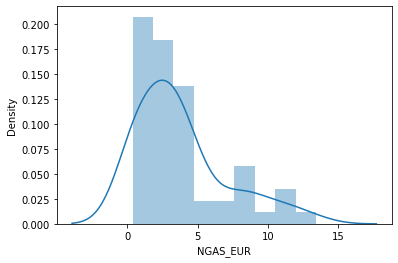

In [521]:
import seaborn as sns

sns.distplot(df3['NGAS_EUR'])

4.2. Korelasia view

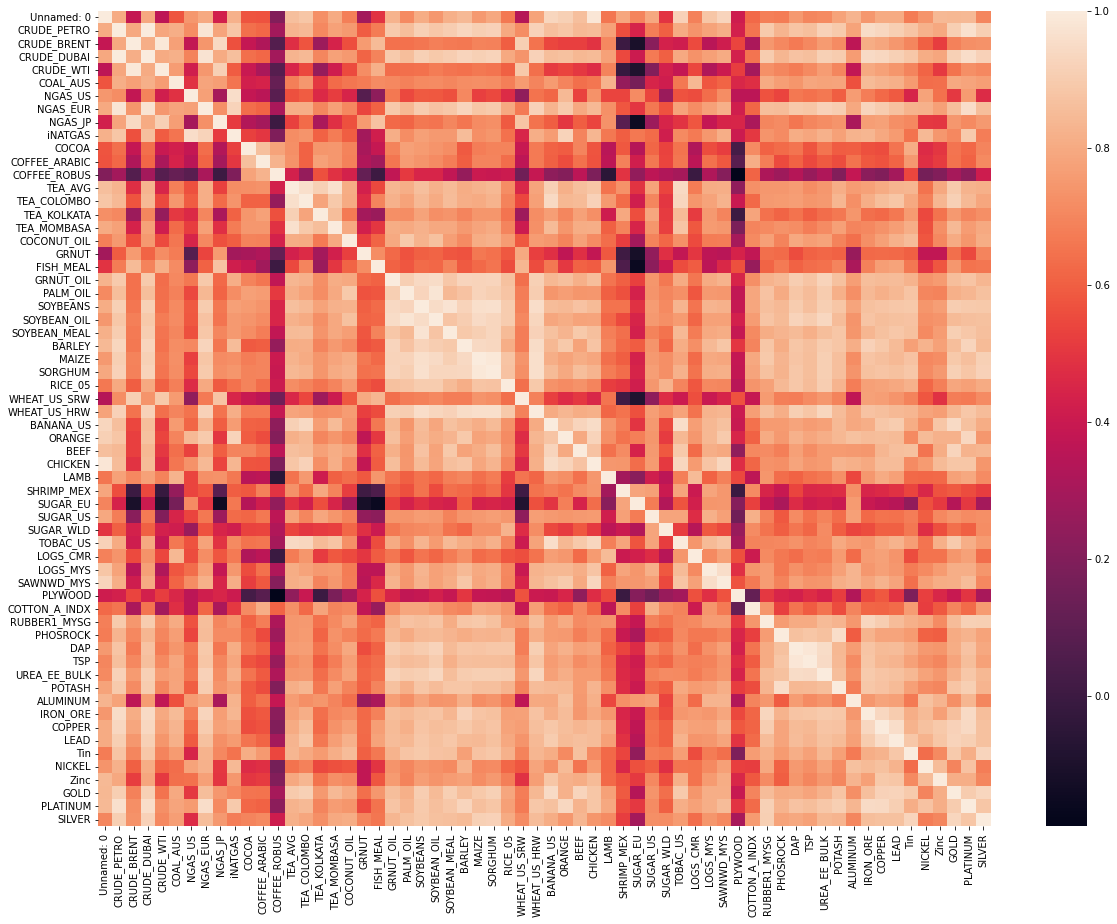

In [522]:
pyplot.subplots(figsize=(20,15))
sns.heatmap(df3.corr())

In [523]:
# Create correlation matrix
df3.corr()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,BARLEY,MAIZE,SORGHUM,RICE_05,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_US,ORANGE,BEEF,CHICKEN,LAMB,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
Unnamed: 0,1.000000,0.802748,0.383077,0.791597,0.365035,0.572999,0.744659,0.795466,0.426321,0.822052,0.573672,0.570047,0.204819,0.861488,0.881902,0.725425,0.804432,0.682159,0.289733,0.492445,0.827207,0.707348,0.808094,0.745337,0.814456,0.845538,0.749052,0.791293,0.661185,0.340951,0.779289,0.932121,0.913189,0.861456,0.983498,0.656254,0.789460,0.696826,0.795231,0.496724,0.920445,0.684408,0.879289,0.927082,0.410340,0.625058,0.682470,0.673124,0.752728,0.700743,0.707935,0.778448,0.829491,0.745720,0.802365,0.801224,0.672120,0.736024,0.846235,0.840370,0.842705,0.700156
CRUDE_PETRO,0.802748,1.000000,0.793490,0.998903,0.788724,0.813089,0.717437,0.979180,0.782519,0.883669,0.640335,0.621140,0.290115,0.829577,0.845087,0.705093,0.774473,0.749496,0.591225,0.672605,0.896989,0.856545,0.913631,0.886937,0.904548,0.931945,0.907033,0.917295,0.797275,0.718976,0.919273,0.860687,0.881934,0.841925,0.855794,0.772602,0.559902,0.440633,0.674707,0.600299,0.802704,0.735795,0.780173,0.812284,0.429083,0.655065,0.896204,0.830782,0.876351,0.864405,0.917873,0.895575,0.780077,0.948953,0.935368,0.910321,0.876470,0.822952,0.794505,0.908879,0.963497,0.908424
CRUDE_BRENT,0.383077,0.793490,1.000000,0.809439,0.990694,0.769604,0.380352,0.743287,0.942376,0.566534,0.386148,0.324532,0.071896,0.477384,0.575327,0.274398,0.440252,0.560662,0.758089,0.848466,0.646331,0.642094,0.656797,0.680992,0.669148,0.660597,0.691703,0.684506,0.598130,0.909128,0.647063,0.541918,0.525279,0.524688,0.492930,0.706617,-0.000823,-0.110903,0.220872,0.436287,0.414565,0.553544,0.349371,0.418398,0.535720,0.315810,0.744821,0.703960,0.666820,0.705659,0.754420,0.713339,0.362995,0.805690,0.789595,0.745550,0.701835,0.600455,0.518911,0.684434,0.723497,0.732677
CRUDE_DUBAI,0.791597,0.998903,0.809439,1.000000,0.800928,0.818461,0.688821,0.973969,0.802702,0.864071,0.641080,0.623161,0.292832,0.828628,0.845475,0.699942,0.775876,0.752366,0.613104,0.692778,0.894880,0.858790,0.914132,0.888449,0.906592,0.928736,0.912596,0.921953,0.798967,0.737381,0.916320,0.858795,0.865234,0.841407,0.847983,0.775694,0.545716,0.409217,0.665469,0.603848,0.798876,0.731587,0.770563,0.800428,0.430939,0.653944,0.898778,0.835391,0.871818,0.861459,0.915570,0.898299,0.762209,0.948483,0.936873,0.911965,0.884025,0.808634,0.786966,0.916281,0.957595,0.917690
CRUDE_WTI,0.365035,0.788724,0.990694,0.800928,1.000000,0.758971,0.420385,0.746926,0.914538,0.591222,0.398782,0.308936,0.077907,0.450568,0.547231,0.252382,0.415639,0.551247,0.719371,0.818154,0.634705,0.637965,0.642743,0.672407,0.655648,0.642789,0.661464,0.655868,0.601867,0.891019,0.640096,0.515031,0.535086,0.504246,0.474102,0.689102,-0.017038,-0.092131,0.200386,0.431134,0.384808,0.540970,0.327727,0.405071,0.521039,0.293365,0.728243,0.698271,0.674416,0.710491,0.760874,0.701454,0.372562,0.797407,0.774003,0.741836,0.694734,0.613642,0.509231,0.648526,0.722857,0.706861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NICKEL,0.736024,0.822952,0.600455,0.808634,0.613642,0.636141,0.778968,0.819902,0.506827,0.844930,0.466669,0.483746,0.166937,0.646820,0.684917,0.546733,0.566574,0.581276,0.374547,0.497076,0.735274,0.700087,0.741797,0.729487,0.709699,0.824646,0.704732,0.716043,0.621967,0.578660,0.785850,0.722942,0.847992,0.652782,0.755459,0.621981,0.

In [524]:
# sum of correlations for each columns
df3.corr().sum()

Unnamed: 0     44.543064
CRUDE_PETRO    49.763578
CRUDE_BRENT    36.461428
CRUDE_DUBAI    49.704666
CRUDE_WTI      35.822519
                 ...    
NICKEL         42.065455
Zinc           43.382331
GOLD           48.737151
PLATINUM       49.421609
SILVER         47.306354
Length: 62, dtype: float64

5 - Train the Linear Regeression Model

5.1. "X" - row data and "y" - Target detection

In [525]:
y = df3['NGAS_EUR']

In [526]:
y.head(10)

0    0.404774
1    0.404774
2    0.404774
3    0.391351
4    0.384150
5    0.410766
6    0.424929
7    0.456647
8    0.451802
9    0.451820
Name: NGAS_EUR, dtype: float64

In [527]:
X = df3.drop(['NGAS_EUR'], axis = 1, inplace=False)

#inplace = False degani, drop bulgan ustun DF3 ni ozida qoladi

5.2. Divide the data into TRAIN and TEST parts

In [528]:
from sklearn.model_selection import train_test_split

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [530]:
print(X_train.shape, X_test.shape)

(42, 61) (18, 61)


In [531]:
print(y_train.shape, y_test.shape)

(42,) (18,)


## 5.3. Create a Model (Linear Regression Model)

In [532]:
from sklearn.linear_model import LinearRegression

In [533]:
lm = LinearRegression()

## 5.4. TRAIN the model


In [534]:
lm.fit(X_train, y_train)

LinearRegression()

In [535]:
lm.intercept_

144.46506020651333

In [536]:
lm.coef_

array([-7.38678964e-02, -3.09117732e-02, -1.41696916e-01,  1.24209788e-02,
        1.93746658e-01,  3.12513037e-02, -3.01941942e-02, -2.54139605e-02,
        4.15646393e-02,  2.26992984e-02, -1.08142862e-01, -2.02121852e-03,
       -2.29438340e-02, -9.30408142e-03, -2.54917274e-02, -3.40393510e-02,
       -1.25478735e-03,  1.50057355e-03, -1.85382968e-03, -1.45510731e-03,
        3.95358513e-03, -4.23177851e-03, -5.25778145e-04,  5.97142236e-03,
        3.07548842e-02, -4.23122357e-02,  6.48750218e-02, -5.81556605e-03,
       -1.52136050e-02, -1.17369482e-02, -1.16626554e-02, -4.05522982e-03,
       -5.40305923e-02, -2.71576186e-03,  2.40384048e-02, -5.45739810e-02,
       -2.01266166e-03,  1.03474650e-02,  1.60863166e-02,  4.47665474e-04,
       -5.21345447e-03,  1.06646339e-02, -1.26255418e-03,  5.72336814e-04,
        4.35271813e-02,  2.21381961e-02,  1.91632565e-02,  4.17028608e-03,
       -2.65924742e-03, -3.19059635e-03,  2.57708247e-03,  7.75781823e-05,
       -1.09446895e-02,  

# 6 - Model-based estimation

In [537]:
pred = lm.predict(X_test)

In [538]:
pred

array([ 5.58674841,  5.66656182,  7.99085711,  1.95884284,  1.53988572,
        0.42160755,  1.75393981,  4.87325272,  0.58722297,  1.93292278,
        4.45241127,  1.53289053, 10.32812784,  2.94572684,  0.4496626 ,
        2.7682099 ,  8.15354015, -0.15933466])

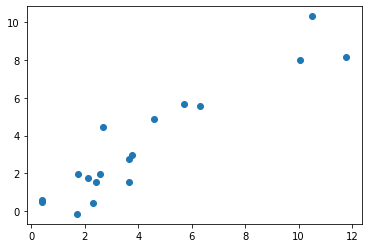

In [539]:
pyplot.scatter(y_test, pred)

### 6.2. Error evaluation

In [540]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((pred - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_test, y_test))

Coefficients: 
 [-7.38678964e-02 -3.09117732e-02 -1.41696916e-01  1.24209788e-02
  1.93746658e-01  3.12513037e-02 -3.01941942e-02 -2.54139605e-02
  4.15646393e-02  2.26992984e-02 -1.08142862e-01 -2.02121852e-03
 -2.29438340e-02 -9.30408142e-03 -2.54917274e-02 -3.40393510e-02
 -1.25478735e-03  1.50057355e-03 -1.85382968e-03 -1.45510731e-03
  3.95358513e-03 -4.23177851e-03 -5.25778145e-04  5.97142236e-03
  3.07548842e-02 -4.23122357e-02  6.48750218e-02 -5.81556605e-03
 -1.52136050e-02 -1.17369482e-02 -1.16626554e-02 -4.05522982e-03
 -5.40305923e-02 -2.71576186e-03  2.40384048e-02 -5.45739810e-02
 -2.01266166e-03  1.03474650e-02  1.60863166e-02  4.47665474e-04
 -5.21345447e-03  1.06646339e-02 -1.26255418e-03  5.72336814e-04
  4.35271813e-02  2.21381961e-02  1.91632565e-02  4.17028608e-03
 -2.65924742e-03 -3.19059635e-03  2.57708247e-03  7.75781823e-05
 -1.09446895e-02  5.60841776e-04 -1.09843596e-03  1.79400436e-05
  4.99474564e-05  3.67391254e-04  2.58244474e-03 -3.02214684e-03
 -2.65395

### 6.3. Calculate the probability for 2020 and see the clear difference.

In [541]:
X_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/testCMO_HISTORICAL.csv')
X_new

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,BEEF,CHICKEN,LAMB,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,2020,41.257778,42.3,42.165,39.308333,60.785,65.656667,2.014375,3.242024,8.313348,45.506044,2.369864,3.32363,1.515878,2.6993,3.404167,2.686275,2.007458,1010.403714,1838.6725,1432.699593,1672.415455,751.766158,824.07235,406.639842,837.756322,394.179002,97.600365,165.466,171.574551,496.75,481.833333,474.616667,427.96,227.738798,212.010976,0.897118,1.21633,0.602985,4.667309,1.631694,..,12.673074,0.372711,0.59466,0.283128,4336.28125,399.46375,278.936418,615.1681,699.707333,511.632104,1.585838,1.33055,1.728025,76.051667,312.424167,265.0375,229.100833,217.791667,1703.986667,108.918333,6173.770833,1824.880833,17124.59917,13787.25667,2266.449167,1770.254167,883.393333,20.536583


In [542]:
X_new['LAMB'] = means['LAMB']

In [543]:
X_new.head()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,BEEF,CHICKEN,LAMB,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,2020,41.257778,42.3,42.165,39.308333,60.785,65.656667,2.014375,3.242024,8.313348,45.506044,2.369864,3.32363,1.515878,2.6993,3.404167,2.686275,2.007458,1010.403714,1838.6725,1432.699593,1672.415455,751.766158,824.07235,406.639842,837.756322,394.179002,97.600365,165.466,171.574551,496.75,481.833333,474.616667,427.96,227.738798,212.010976,0.897118,1.21633,0.602985,4.667309,1.631694,3.218712,12.673074,0.372711,0.59466,0.283128,4336.28125,399.46375,278.936418,615.1681,699.707333,511.632104,1.585838,1.33055,1.728025,76.051667,312.424167,265.0375,229.100833,217.791667,1703.986667,108.918333,6173.770833,1824.880833,17124.59917,13787.25667,2266.449167,1770.254167,883.393333,20.536583


In [544]:
X_new = X_new.drop(columns = list(missing_columns))

In [545]:
X_new = X_new.drop(['NGAS_EUR'],axis=1)

In [546]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1 non-null      int64  
 1   CRUDE_PETRO    1 non-null      float64
 2   CRUDE_BRENT    1 non-null      float64
 3   CRUDE_DUBAI    1 non-null      float64
 4   CRUDE_WTI      1 non-null      float64
 5   COAL_AUS       1 non-null      float64
 6   NGAS_US        1 non-null      float64
 7   NGAS_JP        1 non-null      float64
 8   iNATGAS        1 non-null      float64
 9   COCOA          1 non-null      float64
 10  COFFEE_ARABIC  1 non-null      float64
 11  COFFEE_ROBUS   1 non-null      float64
 12  TEA_AVG        1 non-null      float64
 13  TEA_COLOMBO    1 non-null      float64
 14  TEA_KOLKATA    1 non-null      float64
 15  TEA_MOMBASA    1 non-null      float64
 16  COCONUT_OIL    1 non-null      float64
 17  GRNUT          1 non-null      float64
 18  FISH_MEAL     

In [547]:
X_new.shape

(1, 61)

In [548]:
pred_new = lm.predict(X_new)
pred_new

array([3.89975732])

6.4. In fact, "NGAS_UER" in 2020 is given as = 3.24. Adaptation to estimated data

In [549]:
NGAS_EUR_2020_ORG = 3.24
NGAS_EUR_2020_PRED = pred_new


print('2020 NGAS_UER original value:', NGAS_EUR_2020_ORG)
print('2020 NGAS_UER original predicted:', NGAS_EUR_2020_PRED)
print('Difference :', NGAS_EUR_2020_ORG - NGAS_EUR_2020_PRED)

print('Prediction Accuracy:', 100-100*(NGAS_EUR_2020_ORG - NGAS_EUR_2020_PRED)/NGAS_EUR_2020_ORG)

2020 NGAS_UER original value: 3.24
2020 NGAS_UER original predicted: [3.89975732]
Difference : [-0.65975732]
Prediction Accuracy: [120.36288016]
